# If a Tree Falls in a Forest Challenge
___
The [Adult Data Set](http://archive.ics.uci.edu/ml/datasets/Adult) contains census information and about adults in the United States and whether or not they make more or less than $50K per year. It was donated by Ronny Kohavi and Barry Becker to the UCI Machine Learning Repository.



In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import seaborn as sns



%matplotlib inline

In [2]:
df = pd.read_csv('adult.csv', header=None)

In [3]:
print(df.shape)
df.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native-country', 'over_50K']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native-country    32561 non-null object
over_50K          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Look at unique values for object columns
objects_cols = df.select_dtypes(include=[object]).columns
for i in objects_cols:
    print(i, len(df[i].unique()))

workclass 9
education 16
marital_status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42
over_50K 2


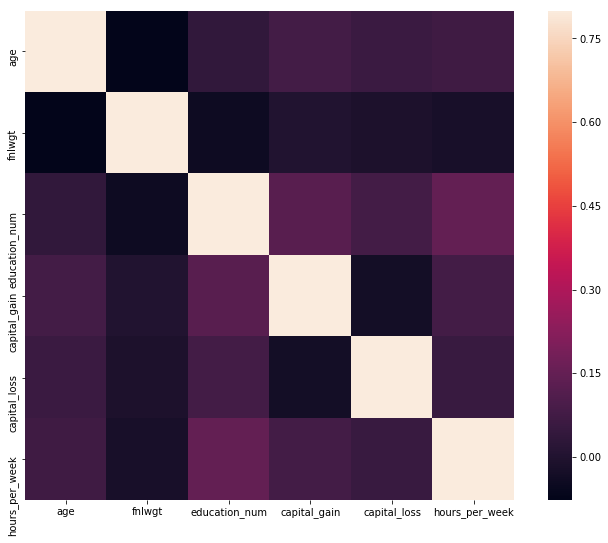

In [7]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [8]:
df['over_50K'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
features = df.drop(['over_50K'], axis=1)
features = pd.get_dummies(features)

over_50K = np.where(df['over_50K'] == ' >50K', 1, 0) 

# Decision Tree

In [57]:
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
#import pydotplus
#import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=10,
    max_depth=20,
)
decision_tree.fit(features, over_50K)
# Render our tree.
#dot_data = tree.export_graphviz(
#    decision_tree, out_file=None,
#    feature_names=features.columns,
#    class_names=['Over_50K', 'Under_50K'],
#    filled=True
#)
#graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
decision_tree.score(features, over_50K)

0.8875955898160376

In [59]:
#cross validation
from sklearn.model_selection import cross_val_score


cross_val_score(decision_tree, features, over_50K, cv=10)

array([0.82929076, 0.83292383, 0.84060197, 0.83046683, 0.84367322,
       0.82923833, 0.83108108, 0.84305897, 0.84551597, 0.82432432])

# Random Forest

In [60]:
rfc = ensemble.RandomForestClassifier()


cross_val_score(rfc, features, over_50K, cv=10)

array([0.83512435, 0.84858722, 0.84735872, 0.83783784, 0.85135135,
       0.84244472, 0.85165848, 0.8507371 , 0.8482801 , 0.8470516 ])

In [61]:
from datetime import datetime
start_time = datetime.now()
# do your work here
cross_val_score(rfc, features, over_50K, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:04.684884


In [62]:
from datetime import datetime
start_time = datetime.now()
# do your work here
cross_val_score(decision_tree, features, over_50K, cv=10)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.873542


#### The decision tree took .87 seconds, while the random forest took 4.68 seconds. The random forest was only slightly better at predicting.